## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Load the appropriate libraries

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [ ]:
#Read the data into a dataframe
df = pd.read_csv('data/goodreads.csv')
df

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 

,4.4,136455,439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,61120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind
...,...,...,...,...,...,...,...,...,...,...
5994,4.17,2226,767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt
5995,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug
5996,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed
5997,3.91,281,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ


Lets read the csv file with custom column descriptions specified in the problem statement.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

df=pd.read_csv('data/goodreads.csv', header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

df.style.set_properties(**{'text-align': 'center'})
df
#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,61120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5995,4.17,2226,767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed
5998,3.91,281,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [ ]:
#Start by check the column data types
####### 
#   Insert your code
####### 

df.columns = ["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
pd.DataFrame(df.dtypes, columns=['Data Types']).style.set_properties(**{'text-align': 'center'})

,Data Types
rating,float64
review_count,object
isbn,object
booktype,object
author_url,object
year,float64
genre_urls,object
dir,object
rating_count,object
name,object


There are a couple more quick sanity checks to perform on the dataframe. 

In [ ]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
# display(df[:5]) 
row_size = len(df)
print(row_size)
print()
print(df.index) 
print()
display(df.columns) 
print()
print(df.axes) 
print()
print('size = ', df.size) 
print()
print("shape =",df.shape) 
print()
print(df.ndim,"dimensions") 
print()
print('empty? ans:', ('yes' if df.empty else 'no'))
print()
print('Transpose:')
display(df[:3].T[:4])
print()
# print(df.values) 
# print()

6000

RangeIndex(start=0, stop=6000, step=1)



Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')


[RangeIndex(start=0, stop=6000, step=1), Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')]

size =  60000

shape = (6000, 10)

2 dimensions

empty? ans: no

Transpose:


,0,1,2
rating,4.4,4.41,3.56
review_count,136455,16648,85746
isbn,439023483,439358078,316015849
booktype,good_reads:book,good_reads:book,good_reads:book


Was the data read correctly and values represented as we expected?

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [ ]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna()
darr = pd.DataFrame(df.isna().sum(), columns = ['How many missing values'])
darr.style.set_properties(**{'text-align': 'center'})

,How many missing values
rating,2
review_count,0
isbn,475
booktype,0
author_url,0
year,7
genre_urls,62
dir,0
rating_count,0
name,0


In [ ]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
# df.loc[df['year'] < 0][:3]
for column in df.columns:
    empty_rows = df[column].isna().sum()
    print('There are',empty_rows,'missing values in the column',column)
    if empty_rows == 0:
        continue
    bool_arr = pd.isna(df[column])
    display(df[bool_arr])
    print()

There are 2 missing values in the column rating


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None



There are 0 missing values in the column review_count
There are 475 missing values in the column isbn


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
16,3.92,38061,NaN,good_reads:book,https://www.goodreads.com/author/show/498072.A...,2003.0,/genres/fiction|/genres/romance|/genres/fantas...,dir01/18619684-the-time-traveler-s-wife.html,927254,The Time Traveler's Wife
49,3.85,11628,NaN,good_reads:book,https://www.goodreads.com/author/show/5152.Vla...,1955.0,/genres/classics|/genres/fiction|/genres/liter...,dir01/7604.Lolita.html,374886,Lolita
85,4.16,14968,NaN,good_reads:book,https://www.goodreads.com/author/show/137902.R...,2007.0,/genres/young-adult|/genres/teen|/genres/young...,dir01/18660669-vampire-academy.html,297022,"Vampire Academy (Vampire Academy, #1)"
116,3.92,8393,NaN,good_reads:book,https://www.goodreads.com/author/show/957894.A...,1942.0,/genres/classics|/genres/fiction|/genres/philo...,dir02/49552.The_Stranger.html,307566,The Stranger
156,4.03,3473,NaN,good_reads:book,https://www.goodreads.com/author/show/4785.Ale...,1843.0,/genres/classics|/genres/fiction|/genres/histo...,dir02/7190.The_Three_Musketeers.html,156968,The Three Musketeers
...,...,...,...,...,...,...,...,...,...,...
5972,4.19,1670,NaN,good_reads:book,https://www.goodreads.com/author/show/4586597....,2011.0,/genres/romance|/genres/romance|/genres/contem...,dir60/12351649-perfection.html,35197,"Perfection (Neighbor from Hell, #2)"
5976,4.23,1185,NaN,good_reads:book,https://www.goodreads.com/author/show/5160667....,2014.0,/genres/romance|/genres/science-fiction|/genre...,dir60/20504754-transcendence.html,4942,Transcendence
5977,4.03,218,NaN,good_reads:book,https://www.goodreads.com/author/show/5769580....,1987.0,/genres/fiction|/genres/novels|/genres/literat...,dir60/5948927.html,1607,Ø§ÙØªÙÙ
5991,4.20,650,NaN,good_reads:book,https://www.goodreads.com/author/show/1112683._,2009.0,/genres/novels|/genres/fiction|/genres/religio...,dir60/6976667.html,2899,Ø£ÙÙØ§Ø­ ÙØ¯Ø³Ø±



There are 0 missing values in the column booktype
There are 0 missing values in the column author_url
There are 7 missing values in the column year


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"



There are 62 missing values in the column genre_urls


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012.0,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,NaN,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013.0,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,NaN,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009.0,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,140921818X,good_reads:book,https://www.goodreads.com/author/show/7337562....,13.0,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,992382009,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014.0,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul
...,...,...,...,...,...,...,...,...,...,...
5618,4.44,4,1495907791,good_reads:book,https://www.goodreads.com/author/show/7399883....,2014.0,NaN,dir57/20835408-the-afternoon-when-she-died.html,9,The Afternoon When She Died
5692,5.00,0,NaN,good_reads:book,https://www.goodreads.com/author/show/5989528....,2012.0,NaN,dir57/14288412-abstraction-in-theory---laws-of...,6,Abstraction In Theory - Laws Of Physical Trans...
5717,4.71,4,NaN,good_reads:book,https://www.goodreads.com/author/show/5838022....,2012.0,NaN,dir58/13741511-american-amaranth.html,14,American Amaranth
5729,4.83,16,NaN,good_reads:book,https://www.goodreads.com/author/show/7058502....,2014.0,NaN,dir58/22312293-the-keeper.html,29,"The Keeper (The Keeper, #5)"



There are 0 missing values in the column dir
There are 0 missing values in the column rating_count
There are 0 missing values in the column name


How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [ ]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
# df.fillna(-1)
prevsize = len(df)
df = df.dropna(how = 'all')
df = df.interpolate(method ='linear', limit_direction ='forward')
df = df.dropna()
newsize = len(df)
print(prevsize-newsize, 'rows deleted')
df

503 rows deleted


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,61120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5994,4.37,28,393062260,good_reads:book,https://www.goodreads.com/author/show/62157.Ro...,2007.0,/genres/poetry|/genres/religion|/genres/christ...,dir60/1251125.The_Book_of_Psalms.html,242,The Book of Psalms
5995,4.17,2226,767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed


Ok so we have done some cleaning. Is it enough? 

In [ ]:
#Check the column data types again
####### 
#   Insert your code
####### 

pd.DataFrame(df.dtypes, columns =['data types']).style.set_properties(**{'text-align': 'center'})

,data types
rating,float64
review_count,object
isbn,object
booktype,object
author_url,object
year,float64
genre_urls,object
dir,object
rating_count,object
name,object


Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [ ]:
#Convert rating, review_count and year to int 
#######
# .Insert your code
#######
# df[["rating", "year"]].apply(pd.to_numeric,downcast='integer')
# df.dtypes
df = df.convert_dtypes()
# df['year'].astype(str).astype(Int64) 
df = df.astype({'review_count':'int', 'year':'int'})
af = df.astype({'rating': 'int'})
pd.DataFrame(af.dtypes, columns = ['data types']).style.set_properties(**{'text-align':'center'})

,data types
rating,int64
review_count,int64
isbn,string
booktype,string
author_url,string
year,int64
genre_urls,string
dir,string
rating_count,string
name,string


Final check

Some of the other colums that should be strings have NaN. 

In [ ]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [ ]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [ ]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
####### 
# name = test_string.split('.')[-1]
# name
import sys
show = sys.stdout.write
test_string = df.author_url[0].split('.')[-1]
test_string.split('.')[-1]


'Suzanne_Collins'

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [ ]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above

def get_author(url):
    ####### 
    #   Insert your code
    ####### 
    return url.split('.')[-1]
    # return list(author.split('.')[-1] for author in df.author_url)



#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)


df


,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author
0,4.4,136455,439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins
1,4.41,16648,439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling
2,3.56,85746,316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer
3,4.23,47906,61120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee
4,4.23,34772,679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen
...,...,...,...,...,...,...,...,...,...,...,...
5994,4.37,28,393062260,good_reads:book,https://www.goodreads.com/author/show/62157.Ro...,2007,/genres/poetry|/genres/religion|/genres/christ...,dir60/1251125.The_Book_of_Psalms.html,242,The Book of Psalms,Robert_Alter
5995,4.17,2226,767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt,Candice_Millard
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug,Jenny_Han
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed,Kate_Avelynn


In [ ]:
#Examine some examples of genre_urls

#Test out some string operations to isolate the genre name
####### 
#   Insert your code
####### 
fg = df.genre_urls[0]
fg = fg.split('|')
genres = ''
for g in fg[:-1]:
    genres += g.split('/')[-1]
    genres += ', '
genres += fg[-1].split('/')[-1]
genres

'young-adult, science-fiction, dystopia, fantasy, science-fiction, romance, adventure, book-club, young-adult, teen, apocalyptic, post-apocalyptic, action'

In [ ]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    ####### 
    #   Insert your code
    ####### 
    fg = url
    fg = fg.split('|')
    genres = ''
    for g in fg[:-1]:
        genres += g.split('/')[-1]
        genres += '|'
    genres += fg[-1].split('/')[-1]
    return genres

df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.4,136455,439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,61120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

Choose some columns to generate histograms.

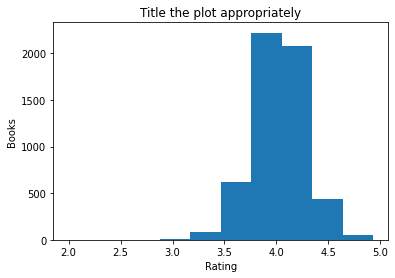

In [ ]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

plt.xlabel('Rating')
plt.ylabel('Books')
plt.title('Title the plot appropriately')

plt.hist(df['rating'])
plt.show()

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

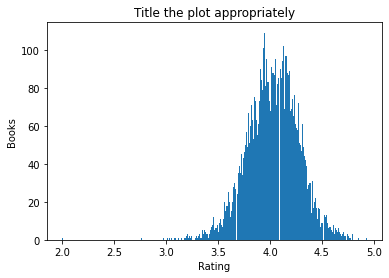

In [ ]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

plt.xlabel('Rating')
plt.ylabel('Books')
plt.title('Title the plot appropriately')

plt.hist(df['rating'], bins=300)
plt.show()


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

For example, we can determine the "best book" by year! Determine the best books in each year.

In [ ]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
new_arr = list()
for year, subset in df.groupby('year'):
    #Find the best book of the year
    ####### 
    #   Insert your code
    ####### 
    # print(year, ' -> ')
    # display(subset)
    a = subset.sort_values(['rating','review_count'], ascending=[False, False])
    
    entry = list(a.iloc[0].values)
    new_arr.append(entry)
    # print(entry)

    
new_arr = pd.DataFrame(new_arr, columns = df.columns)
new_arr = new_arr.reindex(['year', 'name', 'rating', 'review_count', 'isbn', 'booktype', 'dir', 'rating_count', 'author', 'genres'], axis = 1)
display(new_arr)
# print(new_arr.columns)
try:
    del df['author_url']
    del df['genre_urls']
except:
    pass



,year,name,rating,review_count,isbn,booktype,dir,rating_count,author,genres
0,-1500,The Epic of Gilgamesh,3.60,1644,141026286,good_reads:book,dir14/19351.The_Epic_of_Gilgamesh.html,42026,Anonymous,religion|literature|ancient|academic|read-for-...
1,-800,The Iliad/The Odyssey,4.01,365,147712556,good_reads:book,dir03/1375.The_Iliad_The_Odyssey.html,35123,Homer,classics|fantasy|mythology|fantasy|academic|sc...
2,-560,Aesop's Fables,4.03,890,192840509,good_reads:book,dir14/21348.Aesop_s_Fables.html,71259,Aesop,classics|childrens|literature|fantasy|fairy-ta...
3,-512,The Art of War,3.92,3559,1590302257,good_reads:book,dir07/10534.The_Art_of_War.html,114619,Sun_Tzu,non-fiction|politics|classics|literature|psych...
4,-500,The Bhagavad Gita,4.06,1087,140449183,good_reads:book,dir08/99944.The_Bhagavad_Gita.html,31634,Anonymous,classics|spirituality|religion|hinduism|fantas...
...,...,...,...,...,...,...,...,...,...,...
285,2010,J. R. Ward Collection,4.72,104,178048044X,good_reads:book,dir60/10780042-j-r-ward-collection.html,1788,J_R_Ward,romance|paranormal|vampires|fantasy|paranormal...
286,2011,Dare to Dream (100% Official),4.66,513,7444397,good_reads:book,dir57/11792612-dare-to-dream.html,5572,One_Direction,non-fiction|biography
287,2012,If I Should Die Before My Dog --,4.80,46,1475124511,good_reads:book,dir27/16186085-if-i-should-die-before-my-dog--...,81,Joe_Connolly,non-fiction|animals
288,2013,Blade Heart,4.93,7,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Chris_Lange,fantasy|romance|suspense|adventure|romance|fan...


Try this for few other definitions of the "best book" using `.groupby`.

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [ ]:
#Get the unique genres contained in the dataframe.
####### 
#   Insert your code
####### 
gset = set()
# for g in df['genres']:
#     gset.update(g.split('|'))
b = df.sort_values(['rating'], ascending = [False])
b
narr2 = list()
# print(list(b.iloc[0]))
for i in range(len(b)):
    for g in b.iloc[i][-1].split('|'):
        if g not in gset:
            gset.add(g)
            tmparr = list(b.iloc[i])
            tmparr.insert(0, g)
            narr2.append(tmparr)
# print(narr2[:10])
narr2 = pd.DataFrame(narr2, columns = ['Genre', 'rating', 'review_count', 'isbn', 'booktype', 'year', 'dir', 'rating_count', 'Best Movie', 'author', 'all genres'])
narr2 = narr2.reindex(['Genre', 'Best Movie', 'rating', 'review_count', 'year', 'isbn', 'booktype', 'dir', 'rating_count', 'author', 'all genres'], axis = 1)

display(narr2)



,Genre,Best Movie,rating,review_count,year,isbn,booktype,dir,rating_count,author,all genres
0,fantasy,Blade Heart,4.93,7,2013,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Chris_Lange,fantasy|romance|suspense|adventure|romance|fan...
1,romance,Blade Heart,4.93,7,2013,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Chris_Lange,fantasy|romance|suspense|adventure|romance|fan...
2,suspense,Blade Heart,4.93,7,2013,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Chris_Lange,fantasy|romance|suspense|adventure|romance|fan...
3,adventure,Blade Heart,4.93,7,2013,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Chris_Lange,fantasy|romance|suspense|adventure|romance|fan...
4,fantasy-romance,Blade Heart,4.93,7,2013,1781843457,good_reads:book,dir38/18080358-blade-heart.html,15,Chris_Lange,fantasy|romance|suspense|adventure|romance|fan...
...,...,...,...,...,...,...,...,...,...,...,...
524,holland,The Coffee Trader,3.72,492,2002,375760903,good_reads:book,dir57/49491.The_Coffee_Trader.html,4407,David_Liss,historical-fiction|fiction|mystery|book-club|t...
525,denmark,Smilla's Sense of Snow,3.70,1299,1992,385315147,good_reads:book,dir08/124509.Smilla_s_Sense_of_Snow.html,22336,Peter_H_eg,european-literature|scandinavian-literature|cu...
526,prehistory,Stonehenge,3.56,317,1999,60956852,good_reads:book,dir40/101086.Stonehenge.html,5319,Bernard_Cornwell,historical-fiction|fiction|fantasy|adventure|e...
527,crafts,The Friday Night Knitting Club (Friday Night K...,3.39,7237,2006,399154094,good_reads:book,dir34/17204.The_Friday_Night_Knitting_Club.html,55813,Kate_Jacobs,novels|book-club|fiction|womens-fiction|chick-...


What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [ ]:
#Add a column for each genre
####### 
#   Insert your code
####### 
import warnings
warnings.filterwarnings('ignore')

for g in gset:
    df[g] = list(map(lambda x: (g in x), df['genres']))

del df['genres']
display(df)


,rating,review_count,isbn,booktype,year,dir,rating_count,name,author,books-about-books,brazil,greece,magic,african-literature,photography,sports-and-games,international,astronomy,environment,historical-fiction,leadership,gothic-romance,popular-science,turkish-literature,brain,journalism,science-fiction,guides,portuguese-literature,prehistoric,travel,literary-criticism,dogs,jewish,christmas,natural-history,portugal,action,lesbian-fiction,dark,storytime,drawing,italian-literature,middle-grade,war,menage,education,english-literature,erotic-historical-romance,manga,...,scandinavian-literature,language,christian-romance,love-inspired,wolves,bulgarian-literature,egypt,science-fiction-fantasy,maritime,church-history,geography,productivity,poland,holocaust,bizarro-fiction,mormonism,contemporary-romance,graphic-novels,christian-fiction,teen,animals,chick-lit,france,health,terrorism,gender,young-adult-historical-fiction,serbian-literature,17th-century,space-opera,paganism,anthropology,american-civil-war,feminism,comix,fat,female-authors,african-american,14th-century,denmark,plays,kids,biography,comics,swedish-literature,food,poverty,m-f-m,india,new-york
0,4.4,136455,439023483,good_reads:book,2008,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,4.41,16648,439358078,good_reads:book,2003,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3.56,85746,316015849,good_reads:book,2005,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4.23,47906,61120081,good_reads:book,1960,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4.23,34772,679783261,good_reads:book,1813,dir01/1885.Pride_and_Prejudice.html,1388992,Pride 

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [ ]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 

barr = list()
for g in gset:
    barr.append([g, list(df[g].value_counts())[1]])
barr = pd.DataFrame(barr, columns = ['Genre', 'Books'])
barr = barr.sort_values(['Books'], ascending = [False])
barr

,Genre,Books
371,fantasy,2609
144,adult,2407
314,roman,1977
55,young-adult,1953
122,romance,1942
...,...,...
303,x-men,1
116,crafty,1
111,gaming,1
425,dying-earth,1


### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

There is a category called Paranormal Romance!!!!!

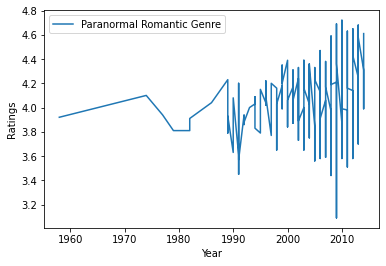

,year,rating,review_count,name,booktype,dir,rating_count,isbn,author,books-about-books,brazil,greece,magic,african-literature,photography,sports-and-games,international,astronomy,environment,historical-fiction,leadership,gothic-romance,popular-science,turkish-literature,brain,journalism,science-fiction,guides,portuguese-literature,prehistoric,travel,literary-criticism,dogs,jewish,christmas,natural-history,portugal,action,lesbian-fiction,dark,storytime,drawing,italian-literature,middle-grade,war,menage,education,english-literature,erotic-historical-romance,manga,...,scandinavian-literature,language,christian-romance,love-inspired,wolves,bulgarian-literature,egypt,science-fiction-fantasy,maritime,church-history,geography,productivity,poland,holocaust,bizarro-fiction,mormonism,contemporary-romance,graphic-novels,christian-fiction,teen,animals,chick-lit,france,health,terrorism,gender,young-adult-historical-fiction,serbian-literature,17th-century,space-opera,paganism,anthropology,american-civil-war,feminism,comix,fat,female-authors,african-american,14th-century,denmark,plays,kids,biography,comics,swedish-literature,food,poverty,m-f-m,india,new-york
737,1958,3.92,3478,The Witch of Blackbird Pond,good_reads:book,dir08/703292.The_Witch_of_Blackbird_Pond.html,81563,440995779,Elizabeth_George_Speare,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4406,1974,4.1,416,The Perilous Gard,good_reads:book,dir45/195381.The_Perilous_Gard.html,4895,618150730,Elizabeth_Marie_Pope,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1473,1977,3.94,592,What Dreams May Come,good_reads:book,dir15/33555.What_Dreams_May_Come.html,6323,765308703,Richard_Matheson,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3457,1979,3.81,304,The Feast of All Saints,good_reads:book,dir35/43798.The_Feast_of_All_Saints.html,13707,345376048,Anne_Rice,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5700,1982,3.81,491,Cry to Heaven,good_reads:book,dir58/31335.Cry_to_Heaven.html,14994,345396936,Anne_Rice,False,False,Fa

In [ ]:
para_romance = df.loc[(df['romance']==True) & (df['paranormal']==True)]
para_romance = para_romance.sort_values(['year'])
carr = list(para_romance.columns)
carr[7], carr[2] = carr[2], carr[7]
carr.remove('year')
carr.insert(0, 'year')
para_romance = para_romance.reindex(carr, axis = 1)

# print(carr)

plt.plot(list(para_romance['year']), list(para_romance['rating']), label='Paranormal Romantic Genre')
plt.ylabel('Ratings')
plt.xlabel('Year')
plt.legend()
plt.show()
display(para_romance)